   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 23.6 MB/s eta 0:00:00
17.075000000000003


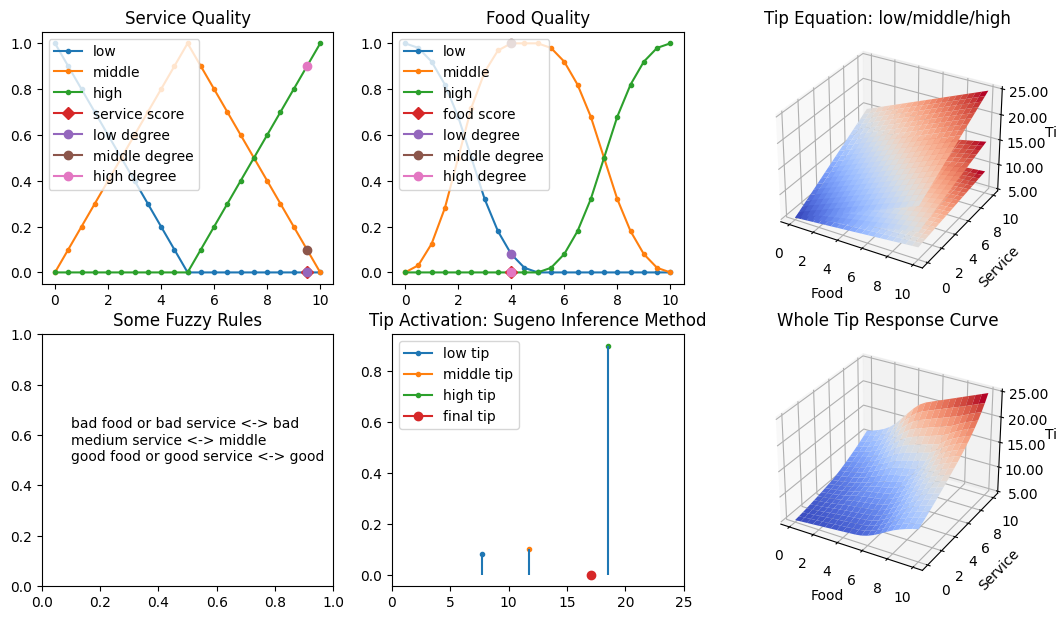

In [3]:
!pip install scikit-fuzzy
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import skfuzzy as fuzz
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter

# for flake8 check
Axes3D

# Problem: from service quality and food quality to tip amount
x_service = np.arange(0, 10.01, 0.5)
x_food = np.arange(0, 10.01, 0.5)
x_tip = np.arange(0, 25.01, 1.0)

# Membership functions
service_low = fuzz.trimf(x_service, [0, 0, 5])
service_middle = fuzz.trimf(x_service, [0, 5, 10])
service_high = fuzz.trimf(x_service, [5, 10, 10])

# food_low = fuzz.trimf(x_food, [0, 0, 5])
# food_middle = fuzz.trimf(x_food, [0, 5, 10])
# food_high = fuzz.trimf(x_food, [5, 10, 10])
food_low = fuzz.zmf(x_food, 0, 5)
food_middle = fuzz.pimf(x_food, 0, 4, 5, 10)
food_high = fuzz.smf(x_food, 5, 10)

# =======================================
# Sugeno Method: z = f(x, y)
# Tip equation: z = ax + by + c
"""
# should use 3D data
tip_low = 5.0 + x_service * 0.2 + x_food * 0.2
tip_middle = 5.0 + x_service * 0.5 + x_food * 0.5
tip_high = 5.0 + x_service * 1.0 + x_food * 1.0
x_tip = x_food
"""
f, s = np.meshgrid(x_food, x_service, indexing="ij")
tip_low_grid = 5.0 + s * 0.2 + f * 0.2
tip_middle_grid = 5.0 + s * 0.5 + f * 0.5
tip_high_grid = 5.0 + s + f

# Input: service score and food score
service_score = 9.5
food_score = 4.0

service_low_degree = fuzz.interp_membership(
    x_service, service_low, service_score)
service_middle_degree = fuzz.interp_membership(
    x_service, service_middle, service_score)
service_high_degree = fuzz.interp_membership(
    x_service, service_high, service_score)

food_low_degree = fuzz.interp_membership(x_food, food_low, food_score)
food_middle_degree = fuzz.interp_membership(x_food, food_middle, food_score)
food_high_degree = fuzz.interp_membership(x_food, food_high, food_score)

# Whole config
fig_scale_x = 2.0
fig_scale_y = 1.5
fig = plt.figure(figsize=(6.4 * fig_scale_x, 4.8 * fig_scale_y))
row = 2
col = 3

plt.subplot(row, col, 1)
plt.title("Service Quality")
plt.plot(x_service, service_low, label="low", marker=".")
plt.plot(x_service, service_middle, label="middle", marker=".")
plt.plot(x_service, service_high, label="high", marker=".")
plt.plot(service_score, 0.0, label="service score", marker="D")
plt.plot(service_score, service_low_degree,
         label="low degree", marker="o")
plt.plot(service_score, service_middle_degree,
         label="middle degree", marker="o")
plt.plot(service_score, service_high_degree,
         label="high degree", marker="o")
plt.legend(loc="upper left")

plt.subplot(row, col, 2)
plt.title("Food Quality")
plt.plot(x_food, food_low, label="low", marker=".")
plt.plot(x_food, food_middle, label="middle", marker=".")
plt.plot(x_food, food_high, label="high", marker=".")
plt.plot(food_score, 0.0, label="food score", marker="D")
plt.plot(food_score, food_low_degree, label="low degree", marker="o")
plt.plot(food_score, food_middle_degree, label="middle degree", marker="o")
plt.plot(food_score, food_high_degree, label="high degree", marker="o")
plt.legend(loc="upper left")

# =======================================
# z = f(x, y)
"""
# should use 3D display
plt.subplot(row, col, 3)
plt.title("Tip")
plt.plot(x_tip, tip_low, label="low", marker=".")
plt.plot(x_tip, tip_middle, label="middle", marker=".")
plt.plot(x_tip, tip_high, label="high", marker=".")
plt.legend(loc="upper left")
"""
ax3 = fig.add_subplot(row, col, 3, projection="3d")
plt.title("Tip Equation: low/middle/high")

ax3.set_xlabel("Food")
ax3.set_ylabel("Service")
ax3.set_zlabel("Tip")
ax3.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf1 = ax3.plot_surface(f, s, tip_low_grid, cmap=cm.coolwarm, linewidth=0)
surf2 = ax3.plot_surface(f, s, tip_middle_grid, cmap=cm.coolwarm, linewidth=0)
surf3 = ax3.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

# =======================================
# Mamdani (max-min) inference method:
# * min because of logic 'and' connective.
# 1) low_degree <-> tip_low
# 2) middle_degree <-> tip_middle
# 3) high_degree <-> tip_high

# =======================================
# bad food OR bad service
low_degree = np.fmax(service_low_degree, food_low_degree)
# medium service
middle_degree = service_middle_degree
# good food OR good service
high_degree = np.fmax(service_high_degree, food_high_degree)

plt.subplot(row, col, 4)
plt.title("Some Fuzzy Rules")
t = ("bad food or bad service <-> bad\n"
     "medium service <-> middle\n"
     "good food or good service <-> good")
plt.text(0.1, 0.5, t)

plt.subplot(row, col, 5)
plt.title("Tip Activation: Sugeno Inference Method")

# Apply the equaltion:
w1 = low_degree
w2 = middle_degree
w3 = high_degree

z1 = 5.0 + 0.2 * food_score + 0.2 * service_score
z2 = 5.0 + 0.5 * food_score + 0.5 * service_score
z3 = 5 + 1.0 * food_score + 1.0 * service_score
z = (w1 * z1 + w2 * z2 + w3 * z3) / (w1 + w2 + w3)
print(z)

plt.plot(z1, w1, label="low tip", marker=".")
plt.xlim(0, 25)
plt.vlines(z1, 0.0, w1)
plt.plot(z2, w2, label="middle tip", marker=".")
plt.vlines(z2, 0.0, w2)
plt.plot(z3, w3, label="high tip", marker=".")
plt.vlines(z3, 0.0, w3)
plt.plot(z, 0.0, label="final tip", marker="o")
plt.legend(loc="upper left")

# =======================================
ax6 = fig.add_subplot(row, col, 6, projection="3d")
plt.title("Whole Tip Response Curve")

for i in range(0, len(f)):
    for j in range(0, len(s)):
        x = f[i, j]
        y = s[i, j]
        f_low_degree = fuzz.interp_membership(x_food, food_low, x)
        f_middle_degree = fuzz.interp_membership(x_food, food_middle, x)
        f_high_degree = fuzz.interp_membership(x_food, food_high, x)

        s_low_degree = fuzz.interp_membership(x_service, service_low, y)
        s_middle_degree = fuzz.interp_membership(x_service, service_middle, y)
        s_high_degree = fuzz.interp_membership(x_service, service_high, y)

        w1 = np.fmax(s_low_degree, f_low_degree)
        w2 = s_middle_degree
        w3 = np.fmax(s_high_degree, f_high_degree)

        tip_high_grid[i, j] = (w1 * tip_low_grid[i, j]
                               + w2 * tip_middle_grid[i, j]
                               + w3 * tip_high_grid[i, j]) / (w1 + w2 + w3)

ax6.set_xlabel("Food")
ax6.set_ylabel("Service")
ax6.set_zlabel("Tip")
ax6.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
surf6 = ax6.plot_surface(f, s, tip_high_grid, cmap=cm.coolwarm, linewidth=0)

#plt.savefig("img/8-tipping-problem-sugeno.png")
plt.show()